In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import tree
from sklearn import neighbors
from sklearn import linear_model
from sklearn import svm
import statsmodels.formula.api as smf

# 1. ĐỌC DỮ LIỆU VÀ TIỀN XỬ LÝ DỮ LIỆU

Đầu tiên, tiến hành đọc file dữ liệu khảo sát mà nhóm đã tổng hợp được.

In [2]:
df_full = pd.read_csv('E:\Lam Nhut Thinh\File NCKH\FINAL.csv')
df_full

,Unnamed: 0,Age,Gender,Marital,Income,Ratio,Education,Profession,Experience,Optimism,...,GL_4,GL_5,GL_6,GL_7,GL_8,GL_9,GL_10,GL_11,GL_12,GL_13
0,0,B,A,A,A,A,B,B,H,A,...,A,B,B,A,A,A,B,A,A,A
1,1,B,A,A,B,C,B,C,D,A,...,C,C,C,B,B,A,B,C,B,C
2,2,B,B,A,A,C,B,B,H,A,...,A,B,A,A,D,A,B,A,A,A
3,3,B,B,A,B,A,B,B,D,A,...,C,B,A,B,B,A,B,B,B,B
4,4,B,A,A,B,C,B,B,H,A,...,A,B,A,A,D,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,106,C,A,B,C,A,C,A,F,A,...,C,B,B,B,A,A,B,A,B,C
496,107,B,A,A,B,A,B,A,F,A,...,B,B,B,B,B,B,A,B,A,B
497,108,C,A,B,C,B,C,C,F,A,...,C,B,C,B,C,B,B,C,B,A
498,109,B,A,A,B,A,B,B,H,A,...,B,A,B,B,B,A,A,A,A,B


Bỏ cột không cần thiết.

In [3]:
df_full = df_full.drop('Unnamed: 0',axis=1)
# df_full=df_full.dropna()

Kiểm tra bộ dữ liệu có dữ liệu rỗng hay không.

In [4]:
df_full.isnull().sum()

Age           0
Gender        0
Marital       0
Income        0
Ratio         0
Education     0
Profession    0
Experience    0
Optimism      0
Source        0
GL_1          0
GL_2          0
GL_3          0
GL_4          0
GL_5          0
GL_6          0
GL_7          0
GL_8          0
GL_9          0
GL_10         0
GL_11         0
GL_12         0
GL_13         0
dtype: int64

Kiểm tra các giá trị có trong từng cột xem có dữ liệu nào lỗi hay không.

In [5]:
for i in df_full.columns.tolist():
    print(df_full[i].unique())

['B' 'C' 'A']
['A' 'B']
['A' 'B']
['A' 'B' 'C']
['A' 'C' 'B']
['B' 'A' 'C']
['B' 'C' 'A']
['H' 'D' 'C' 'E' 'F' 'A' 'G' 'B']
['A' 'B']
['C' 'A' 'B']
['B' 'C' 'A' 'D']
['B' 'A' 'C' 'D']
['C' 'B' 'A' 'D']
['A' 'C' 'B']
['B' 'C' 'A']
['B' 'C' 'A' 'D']
['A' 'B' 'C' 'D']
['A' 'B' 'D' 'C']
['A' 'B']
['B' 'A']
['A' 'C' 'B' 'D']
['A' 'B' 'C']
['A' 'C' 'B' 'D']


In [6]:
df_full

,Age,Gender,Marital,Income,Ratio,Education,Profession,Experience,Optimism,Source,...,GL_4,GL_5,GL_6,GL_7,GL_8,GL_9,GL_10,GL_11,GL_12,GL_13
0,B,A,A,A,A,B,B,H,A,C,...,A,B,B,A,A,A,B,A,A,A
1,B,A,A,B,C,B,C,D,A,A,...,C,C,C,B,B,A,B,C,B,C
2,B,B,A,A,C,B,B,H,A,B,...,A,B,A,A,D,A,B,A,A,A
3,B,B,A,B,A,B,B,D,A,A,...,C,B,A,B,B,A,B,B,B,B
4,B,A,A,B,C,B,B,H,A,A,...,A,B,A,A,D,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,C,A,B,C,A,C,A,F,A,A,...,C,B,B,B,A,A,B,A,B,C
496,B,A,A,B,A,B,A,F,A,A,...,B,B,B,B,B,B,A,B,A,B
497,C,A,B,C,B,C,C,F,A,A,...,C,B,C,B,C,B,B,C,B,A
498,B,A,A,B,A,B,B,H,A,A,...,B,A,B,B,B,A,A,A,A,B


Chia dữ liệu ra thành 2 phần: Các yếu tố ảnh hưởng đến khả năng chấp nhận rủi ro và dữ liệu trắc nghiệm Grable Lytton để tính điểm chịu đựng rủi ro.

In [7]:
df_1 = df_full.loc[:,'Age':'Source']
df_2 = df_full.loc[:,'GL_1':]

In [8]:
df_1

,Age,Gender,Marital,Income,Ratio,Education,Profession,Experience,Optimism,Source
0,B,A,A,A,A,B,B,H,A,C
1,B,A,A,B,C,B,C,D,A,A
2,B,B,A,A,C,B,B,H,A,B
3,B,B,A,B,A,B,B,D,A,A
4,B,A,A,B,C,B,B,H,A,A
...,...,...,...,...,...,...,...,...,...,...
495,C,A,B,C,A,C,A,F,A,A
496,B,A,A,B,A,B,A,F,A,A
497,C,A,B,C,B,C,C,F,A,A
498,B,A,A,B,A,B,B,H,A,A


In [9]:
for i in df_2.columns:
    df_2[i]=df_2[i].apply(lambda x: x.split('.')[0])

<ipython-input-9-9d490729df0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[i]=df_2[i].apply(lambda x: x.split('.')[0])


In [10]:
df_2

,GL_1,GL_2,GL_3,GL_4,GL_5,GL_6,GL_7,GL_8,GL_9,GL_10,GL_11,GL_12,GL_13
0,B,B,C,A,B,B,A,A,A,B,A,A,A
1,B,B,C,C,C,C,B,B,A,B,C,B,C
2,C,A,B,A,B,A,A,D,A,B,A,A,A
3,B,C,B,C,B,A,B,B,A,B,B,B,B
4,C,A,A,A,B,A,A,D,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,C,B,C,C,B,B,B,A,A,B,A,B,C
496,C,C,B,B,B,B,B,B,B,A,B,A,B
497,B,D,A,C,B,C,B,C,B,B,C,B,A
498,B,B,B,B,A,B,B,B,A,A,A,A,B


Dựa vào dữ liệu trắc nghiệm Grable Lytton và thang điểm có sẵn, tiến hành chấm điểm chịu đựng rủi ro của từng quan sát.

In [11]:
df_2['GL_1']=df_2['GL_1'].apply(lambda x: x.replace('A','4').replace('B','3').replace('C','2').replace('D','1'))
df_2['GL_2']=df_2['GL_2'].apply(lambda x: x.replace('A','1').replace('B','2').replace('C','3').replace('D','4'))
df_2['GL_3']=df_2['GL_3'].apply(lambda x: x.replace('A','1').replace('B','2').replace('C','3').replace('D','4'))
df_2['GL_4']=df_2['GL_4'].apply(lambda x: x.replace('A','1').replace('B','2').replace('C','3'))
df_2['GL_5']=df_2['GL_5'].apply(lambda x: x.replace('A','1').replace('B','2').replace('C','3'))
df_2['GL_6']=df_2['GL_6'].apply(lambda x: x.replace('A','1').replace('B','2').replace('C','3').replace('D','4'))
df_2['GL_7']=df_2['GL_7'].apply(lambda x: x.replace('A','1').replace('B','2').replace('C','3').replace('D','4'))
df_2['GL_8']=df_2['GL_8'].apply(lambda x: x.replace('A','1').replace('B','2').replace('C','3').replace('D','4'))
df_2['GL_9']=df_2['GL_9'].apply(lambda x: x.replace('A','1').replace('B','3'))
df_2['GL_10']=df_2['GL_10'].apply(lambda x: x.replace('A','1').replace('B','3'))
df_2['GL_11']=df_2['GL_11'].apply(lambda x: x.replace('A','1').replace('B','2').replace('C','3').replace('D','4'))
df_2['GL_12']=df_2['GL_12'].apply(lambda x: x.replace('A','1').replace('B','2').replace('C','3'))
df_2['GL_13']=df_2['GL_13'].apply(lambda x: x.replace('A','1').replace('B','2').replace('C','3').replace('D','4'))

<ipython-input-11-9d83c95e40ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['GL_1']=df_2['GL_1'].apply(lambda x: x.replace('A','4').replace('B','3').replace('C','2').replace('D','1'))
<ipython-input-11-9d83c95e40ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['GL_2']=df_2['GL_2'].apply(lambda x: x.replace('A','1').replace('B','2').replace('C','3').replace('D','4'))
<ipython-input-11-9d83c95e40ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [12]:
df_2

,GL_1,GL_2,GL_3,GL_4,GL_5,GL_6,GL_7,GL_8,GL_9,GL_10,GL_11,GL_12,GL_13
0,3,2,3,1,2,2,1,1,1,3,1,1,1
1,3,2,3,3,3,3,2,2,1,3,3,2,3
2,2,1,2,1,2,1,1,4,1,3,1,1,1
3,3,3,2,3,2,1,2,2,1,3,2,2,2
4,2,1,1,1,2,1,1,4,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,2,3,3,2,2,2,1,1,3,1,2,3
496,2,3,2,2,2,2,2,2,3,1,2,1,2
497,3,4,1,3,2,3,2,3,3,3,3,2,1
498,3,2,2,2,1,2,2,2,1,1,1,1,2


In [13]:
for i in df_2.columns.tolist():
    df_2[i] = df_2[i].apply(lambda x: int(x))

<ipython-input-13-4548f7e41ac7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[i] = df_2[i].apply(lambda x: int(x))


In [14]:
df_1['Score'] = 0

<ipython-input-14-c54ba94077f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Score'] = 0


In [15]:
for i in range(df_2.shape[0]):
    df_1['Score'].iloc[i,:]=sum(df_2.iloc[i,:])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Thêm cột điểm số chịu đựng rủi ro vào chung với bộ dữ liệu các yếu tố ảnh hưởng.

# 2. Phân tích các yếu tố ảnh hưởng đến điểm chịu đựng rủi ro dựa trên bộ dữ liệu đã thu thập được.

In [16]:
# for i in df_1.columns.tolist()[:-1]:
#         plt.bar(df_1.groupby(i).Score.mean().index,df_1.groupby(i).Score.mean().values,color = 'Darkblue')
#         plt.ylim(24,33)
#         plt.title(f'{i.upper()}')
#         plt.ylabel('Mean Score'.upper())
#         plt.show()

In [17]:
df=df_1.copy()
df

,Age,Gender,Marital,Income,Ratio,Education,Profession,Experience,Optimism,Source,Score
0,B,A,A,A,A,B,B,H,A,C,22
1,B,A,A,B,C,B,C,D,A,A,33
2,B,B,A,A,C,B,B,H,A,B,21
3,B,B,A,B,A,B,B,D,A,A,28
4,B,A,A,B,C,B,B,H,A,A,20
...,...,...,...,...,...,...,...,...,...,...,...
495,C,A,B,C,A,C,A,F,A,A,27
496,B,A,A,B,A,B,A,F,A,A,26
497,C,A,B,C,B,C,C,F,A,A,33
498,B,A,A,B,A,B,B,H,A,A,22


Đưa các dữ liệu chữ về dạng biến giả để có thể đưa vào mô hình (One hot encoding).

In [18]:
len(df['Score'].unique())

27

In [19]:
df=pd.get_dummies(df)

In [20]:
df

,Score,Age_A,Age_B,Age_C,Gender_A,Gender_B,Marital_A,Marital_B,Income_A,Income_B,...,Experience_D,Experience_E,Experience_F,Experience_G,Experience_H,Optimism_A,Optimism_B,Source_A,Source_B,Source_C
0,22,0,1,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
1,33,0,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,21,0,1,0,0,1,1,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,28,0,1,0,0,1,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
4,20,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,27,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
496,26,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
497,33,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
498,22,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,0,0


# 3. Phân chia dữ liệu và chạy mô hình hồi quy tuyến tính.

Chia biến độc lập và biến phụ thuộc để chạy mô hình.

In [21]:
X = df.drop(['Score'],axis=1)
y = df['Score']

In [22]:
rs=70

Chia dữ liệu thành tập train và test với tỉ lệ 80% dữ liệu là tập train và 20% dữ liệu là tập test.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=rs)

Vẽ biểu đồ phân phối của biến phụ thuộc.

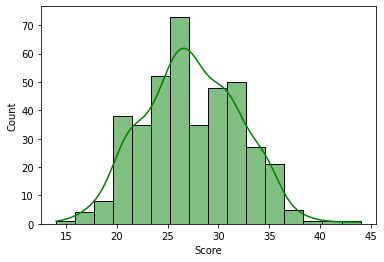

In [24]:
sns.histplot(y_train,kde=True,color='Green')

Kiểm định Jarque - Bera về tính phân phối chuẩn của dữ liệu.

In [25]:
import numpy as np
import scipy.stats as stats

#perform Jarque-Bera test
JB_test_y = pd.DataFrame(stats.jarque_bera(y_train),index=['Statistic','p-value'],columns=['JARQUE - BERA TEST WITH Y RESULT'])
JB_test_y

,JARQUE - BERA TEST WITH Y RESULT
Statistic,1.184371
p-value,0.553117


Nhìn vào p-value, chúng ta có thể kết luận rằng dữ liệu có phân phối chuẩn ở mức ý nghĩa 5%

Sau đó, tiến hành đưa dữ liệu vào mô hình để chạy.

In [26]:
from sklearn.linear_model import LinearRegression, Lasso
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = LinearRegression()
model = sm.OLS(y_train,sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     9.081
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           8.88e-24
Time:                        22:56:08   Log-Likelihood:                -1100.4
No. Observations:                 400   AIC:                             2247.
Df Residuals:                     377   BIC:                             2339.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.4494      0.132     48.762   

Kết quả cho thấy hầu hết các biến đều có ý nghĩa thống kê ở mức ý nghĩa 5%. Có thể nhận thấy rằng các biến Experience hầu như không có ý nghĩa thống kê trong mô hình này nên chúng ta tiến hành loại bỏ các biến Experience.

In [27]:
X=df.drop(['Score','Experience_A','Experience_B','Experience_C','Experience_D',
           'Experience_E','Experience_F','Experience_G','Experience_H'],axis=1)
y=df['Score']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=rs)

Chạy lại mô hình sau khi đã loại bỏ biến Experience.

In [29]:
from sklearn.linear_model import LinearRegression, Lasso
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = LinearRegression()
model = sm.OLS(y_train,sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     12.47
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           2.58e-25
Time:                        22:56:09   Log-Likelihood:                -1106.1
No. Observations:                 400   AIC:                             2244.
Df Residuals:                     384   BIC:                             2308.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.6757      0.112     59.808   

Chúng ta nhận thấy tất cả các biến đều có ý nghĩa thống kê ở mức ý nghĩa 5%. Việc bỏ các biến Experience đã mang lại hiệu quả.

# 4. Kiểm tra khuyết tật của mô hình hồi quy tuyến tính.

Tất cả các kiểm định phía dưới đều xét ở mức ý nghĩa 5%.

Kiểm tra đa cộng tuyến qua việc tính toán VIF của từng biến độc lập.

In [30]:
vif = pd.DataFrame(index = X_train.columns)
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF
Age_A,inf
Age_B,inf
Education_C,7634058.68
Profession_C,6715126.05
Income_C,1012338.29
Ratio_C,644621.79
Source_B,556333.85
Ratio_B,548003.26
Income_B,98482.22
Marital_B,94102.76


Chúng ta nhận thấy tất cả các biến đều xảy ra hiện tượng đa cộng tuyến cao (thậm chí một số biến còn có hiện tượng đa cộng tuyến hoàn hảo). Điều này hoàn toàn dễ hiểu vì các biến phụ thuộc trong mô hình chỉ nhận giá trị 0 và 1 nên hiện tượng này rất dễ xảy ra. Nhìn vào kết quả hồi quy của mô hình chúng ta nhận thấy standard error của các biến đều không quá lớn so với giá trị ước lượng (coef) của biến. Vì vậy tác động của đa cộng tuyến trong trường hợp này có thể được bỏ qua.

Tiếp đến sẽ kiểm tra hiện tượng phương sai sai số thay đổi.

In [31]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)
BP_test_resid = pd.DataFrame(test,index=names,columns = ['BREUSCH - PAGAN TEST RESULT'])
BP_test_resid

,BREUSCH - PAGAN TEST RESULT
Lagrange multiplier statistic,15.769450
p-value,0.896217
f-value,1.050666
f p-value,0.401939


Giá trị f p-value của kiểm định lớn hơn 0.05, tức là mô hình không xảy ra hiện tượng phương sai sai số thay đổi.

Ta kiểm định đến sai phạm tiếp theo là kiểm định sai số không theo phân phối chuẩn. Tiếp tục sử dụng kiểm định Jarque-Bera.

In [32]:
import numpy as np
import scipy.stats as stats


#perform Jarque-Bera test
JB_test_y = pd.DataFrame(stats.jarque_bera(model.resid),index=['Test statistic','p-value'],columns=['JARQUE - BERA TEST WITH RESID RESULT'])
JB_test_y

,JARQUE - BERA TEST WITH RESID RESULT
Test statistic,1.323933
p-value,0.515836


p-value của kiểm định cho thấy rằng mô hình không mắc phải sai phạm này.

Cuối cùng, chúng ta tiến hành kiểm định sai phạm tự tương quan của mô hình.

In [33]:
import statsmodels.stats.diagnostic as dg

BG_test = pd.DataFrame([[1,dg.acorr_breusch_godfrey(model, nlags=1)[0],dg.acorr_breusch_godfrey(model, nlags=1)[1]],
                        [2,dg.acorr_breusch_godfrey(model, nlags=2)[0],dg.acorr_breusch_godfrey(model, nlags=2)[1]],
                        [3,dg.acorr_breusch_godfrey(model, nlags=3)[0],dg.acorr_breusch_godfrey(model, nlags=3)[1]],
                        [4,dg.acorr_breusch_godfrey(model, nlags=4)[0],dg.acorr_breusch_godfrey(model, nlags=4)[1]]],
                        columns = ['p','Test statistic','p-value'])
BG_test=BG_test.set_index('p')
BG_test

,Test statistic,p-value
p,,
1,0.096434,0.756152
2,0.105758,0.948495
3,1.619760,0.654918
4,5.894843,0.207140


In [34]:
reset = dg.linear_reset(model,power = 3,test_type = 'fitted',use_f = True)
reset

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.483604895352119, p=0.616933714962118, df_denom=382, df_num=2>

Ta kiểm định tự tương quan ở cả 4 bậc 1,2,3,4. Mô hình hồi quy không xảy ra tự tương quan ở bất cứ bậc nào (p-value đều lớn hơn 0.05).

# 5. Mô hình hồi quy Lasso.

<ipython-input-35-af0be5eb0fca>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lml.fit(X_train,y_train)
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2953.425901399431, tolerance: 0.8784437500000001
  model = cd_fast.enet_coordinate_descent(


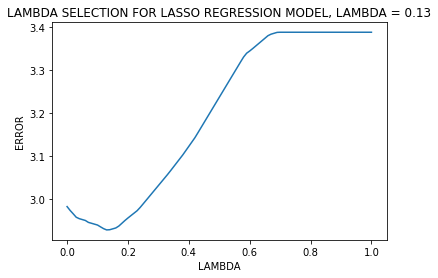

In [35]:
from sklearn.metrics import mean_absolute_error
alpha = []
error = []

for i in range(0,101):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    lml.fit(X_train,y_train)
    y_pred_lml=lml.predict(X_test)
    error.append(mean_absolute_error(y_test,y_pred_lml))
for i in range(0,101):
    if error[i] == min(error):
        t=i
plt.title(f'LAMBDA SELECTION FOR LASSO REGRESSION MODEL, LAMBDA = {alpha[t]}')
plt.xlabel('LAMBDA')
plt.ylabel('ERROR')
plt.plot(alpha,error);

In [36]:
lm_l = Lasso(0.13)
lm_l.fit(X_train,y_train)

Lasso(alpha=0.13)

In [37]:
lm_l

Lasso(alpha=0.13)

# 6. Mô hình hồi quy K-Nearest Neighbors.

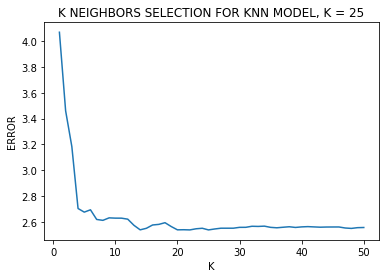

In [38]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = []
error = []
for i in range(1,51):
    neighbors.append(i)
    knn_model = KNeighborsRegressor(n_neighbors=i,weights = 'distance')
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test).reshape(-1,1)
    error.append(mean_absolute_error(y_test,y_pred_knn))
err = tuple(zip(neighbors,error))
df_err = pd.DataFrame(err, columns = ['neighbors','error'])
df_err[df_err.error == min(df_err.error)]
for i in range(len(error)):
    if error[i-1] == min(error):
        t=i
plt.xlabel('K')
plt.ylabel('ERROR')
plt.title(f'K NEIGHBORS SELECTION FOR KNN MODEL, K = {t}')
plt.plot(neighbors,error);

In [39]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=26,weights = 'distance')
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=26, weights='distance')

# 7. Một số mô hình hồi quy khác.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=rs)

## 7.1. Random Forest Regression.

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 70,criterion='mae',max_depth=4)
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=4, random_state=70)

## 7.2. Decision Tree Regression.

In [42]:
dec = tree.DecisionTreeRegressor(max_depth=4)
dec.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

# 8. Đánh giá hiệu quả dự báo của các mô hình.

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def evaluatemodel(true,predicted,modelname):
    MAE = round(mean_absolute_error(true,predicted),3)
    print(modelname)
    print("\tMAE:", MAE)

In [44]:
# y_pred_lm=scaler.inverse_transform(asarray(model.predict(sm.add_constant(X_test))).reshape(-1,1))
# y_pred_lm_l=scaler.inverse_transform(asarray(lm_l.predict(X_test)).reshape(-1,1))
# y_pred_knn = scaler.inverse_transform(asarray(knn_model.predict(X_test)).reshape(-1,1))
y_pred_lm=model.predict(sm.add_constant(X_test))
y_pred_lm_l=lm_l.predict(X_test)
y_pred_knn = [round(i,0) for i in knn_model.predict(X_test)]
y_pred_rf=rf.predict(X_test)
y_pred_dec=dec.predict(X_test)

In [45]:
print('MODEL EVALUATION')
evaluatemodel(y_test,y_pred_lm,'Linear Regression')
evaluatemodel(y_test,y_pred_lm_l,'Lasso Regression')
evaluatemodel(y_test,y_pred_knn,'K-Nearest Neighbors')
evaluatemodel(y_test,y_pred_rf,'Random Forest Regression')
evaluatemodel(y_test,y_pred_dec,'Decision Tree Regression')

MODEL EVALUATION
Linear Regression
	MAE: 2.983
Lasso Regression
	MAE: 2.928
K-Nearest Neighbors
	MAE: 2.57
Random Forest Regression
	MAE: 2.887
Decision Tree Regression
	MAE: 2.897


# 9. Nhóm các giá trị dự báo theo các yếu tố ảnh hưởng của các mô hình.

In [46]:
# X_1 = df_1.drop(['Score','Experience'],axis=1)
# y_1 = df_1['Score']

In [47]:
# from sklearn.model_selection import train_test_split
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
# X_1, y_1, test_size=0.2, random_state=70)

In [48]:
# df_lm = X_test_1
# df_lm_l = X_test_1
# df_rf = X_test_1
# df_dec = X_test_1
# df_knn = X_test_1
# df_lm['Score'] = y_pred_lm
# df_lm_l['Score'] = y_pred_lm_l
# df_knn['Score'] = y_pred_knn
# df_rf['Score'] = y_pred_rf
# df_dec['Score'] = y_pred_dec

In [49]:
# list_df=[['Linear Regression',df_lm],['Lasso Regression',df_lm_l],['K-Nearest Neighbors',df_knn],
#          ['Random Forest Regression',df_rf],['Decision Tree Regression',df_dec]]
# colors = ['Darkred','Gold','Saddlebrown','Darkgreen','Black']
# for i in range(len(list_df)):
#     print(list_df[i][0].upper())
#     for j in list_df[i][1].columns.tolist()[:-1]:
#         plt.bar(list_df[i][1].groupby(j).Score.mean().index,list_df[i][1].groupby(j).Score.mean().values,color = colors[i])
#         plt.ylim(24,30)
#         plt.title(f'{j.upper()} - {list_df[i][0].upper()}')
#         plt.show()

# 10. Kết hợp các mô hình theo trọng số.

In [50]:
# combine_err = []
# combine_err_detail = []
# for i in range(0,101):
#     for j in range(0,101):
#         if i+j<=100:
#             combine_err.append(mean_absolute_error(y_test,(i/100)*y_pred_knn+(j/100)*y_pred_rf+((100-i-j)/100)*y_pred_dec))
#             detail = []
#             if mean_absolute_error(y_test,(i/100)*y_pred_knn+(j/100)*y_pred_rf+((100-i-j)/100)*y_pred_dec) == min(combine_err):
#                 detail.append(i)
#                 detail.append(j)
#                 detail.append(100-i-j)
#                 detail.append(round(min(combine_err),3))
#                 combine_err_detail.append(detail)
# combine_err_detail[-10:]

In [51]:
# combine_pred = []
# for i in range(len(y_test)):
#     combine = []
#     combine.append(abs(y_test.values.tolist()[i]-y_pred_lm.values.tolist()[i]))
#     combine.append(abs(y_test.values.tolist()[i]-y_pred_lm_l.tolist()[i]))
#     combine.append(abs(y_test.values.tolist()[i]-y_pred_knn.tolist()[i]))
#     combine.append(abs(y_test.values.tolist()[i]-y_pred_rf.tolist()[i]))
#     combine.append(abs(y_test.values.tolist()[i]-y_pred_dec.tolist()[i]))
#     for j in [y_pred_lm,y_pred_lm_l,y_pred_knn,y_pred_rf,y_pred_dec]:
#         if abs(y_test.values.tolist()[i]-j.tolist()[i]) == min(combine):
#             combine_pred.append(j.tolist()[i])
#             break

In [52]:
# mean_absolute_error(y_test,combine_pred)

In [53]:
# #Nữ, 45 tuổi, thu nhập trên 12tr, đã kết hôn, dành 20-50% thu nhập để đầu tư, trình độ sau đại học,
# #có kiến thức chuyên môn về đầu tư, lựa chọn lợi suất ổn định, nguồn thu nhập chính là tiền lương lao động.
# Age = [1,0,0]
# Gender = [0,1]
# Marital = [1,0]
# Income = [1,0,0]
# Ratio = [1,0,0]
# Education = [1,0,0]
# Profession = [1,0,0]
# Optimism = [1,0]
# Source = [1,0,0]
# Input = [Age,Gender,Marital,Income,Ratio,Education,Profession,Optimism,Source]
# input_data = [1]
# for i in Input:
#     for j in i:
#         input_data.append(j)
# input_data

In [54]:
# from numpy import asarray
# data=pd.DataFrame(input_data).T
# print('Linear Regression:',round(model.predict(data).values[0],3))
# print('Lasso Regression:',round(lm_l.predict(np.array(data.iloc[:,1:]))[0],3))
# print('KNN Regression:',round(knn_model.predict(np.array(data.iloc[:,1:]))[0],3))
# print('Random Forest Regression:',round(rf.predict(np.array(data.iloc[:,1:]))[0],3))
# print('Decision Tree Regression:',round(dec.predict(np.array(data.iloc[:,1:]))[0],3))

In [55]:
# #Nam, 20 tuổi, thu nhập 3tr - 12tr, độc thân, dành dưới 20% thu nhập để đầu tư, trình độ phổ thông,
# #có kiến thức vừa đủ về đầu tư, lựa chọn lợi suất ổn định, nguồn thu nhập chính là tiền lương lao động.
# Age = [0,1,0]
# Gender = [0,1]
# Marital = [1,0]
# Income = [0,1,0]
# Ratio = [1,0,0]
# Education = [1,0,0]
# Profession = [0,0,1]
# Optimism = [1,0]
# Source = [1,0,0]
# Input = [Age,Gender,Marital,Income,Ratio,Education,Profession,Optimism,Source]
# input_data = [1]
# for i in Input:
#     for j in i:
#         input_data.append(j)
# input_data

In [56]:
# from numpy import asarray
# data=pd.DataFrame(input_data).T
# print('Linear Regression:',round(model.predict(data).values[0],3))
# print('Lasso Regression:',round(lm_l.predict(np.array(data.iloc[:,1:]))[0],3))
# print('KNN Regression:',round(knn_model.predict(np.array(data.iloc[:,1:]))[0],3))
# print('Random Forest Regression:',round(rf.predict(np.array(data.iloc[:,1:]))[0],3))
# print('Decision Tree Regression:',round(dec.predict(np.array(data.iloc[:,1:]))[0],3))

# 11. Dùng GridSearchCV để cải thiện mô hình hồi quy KNN.

In [57]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 51))
knn_param = dict(n_neighbors = k_range,
                 p = [1,2],
                 leaf_size = [5,8,10,13,15,18,20],
                 algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])
  

knn = KNeighborsRegressor(weights = 'distance') 
grid_knn = GridSearchCV(knn, knn_param, cv=5, scoring='neg_mean_absolute_error')
grid_knn.fit(X_train,y_train)
print("Tuned hyperparameters :(best parameters) ",grid_knn.best_params_)

Tuned hyperparameters :(best parameters)  {'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 9, 'p': 1}


In [58]:
y_pred_grid=grid_knn.predict(X_test)

In [59]:
mean_absolute_error(y_test,y_pred_grid)

2.5903993261640323

In [60]:
# c_test = []
# for i in y_test:
#     if i<=18:
#         c_test.append('L')
#     elif i<=32:
#         c_test.append('M')
#     else:
#         c_test.append('H')
# c_lm = []
# for i in y_pred_lm:
#     if i<=18:
#         c_lm.append('L')
#     elif i<=32:
#         c_lm.append('M')
#     else:
#         c_lm.append('H')
# c_lm_l = []
# for i in y_pred_lm_l:
#     if i<=18:
#         c_lm_l.append('L')
#     elif i<=32:
#         c_lm_l.append('M')
#     else:
#         c_lm_l.append('H')
# c_knn = []
# for i in y_pred_knn:
#     if i<=18:
#         c_knn.append('L')
#     elif i<=32:
#         c_knn.append('M')
#     else:
#         c_knn.append('H')
# c_rf = []
# for i in y_pred_rf:
#     if i<=18:
#         c_rf.append('L')
#     elif i<=32:
#         c_rf.append('M')
#     else:
#         c_rf.append('H')
# c_dec = []
# for i in y_pred_dec:
#     if i<=18:
#         c_dec.append('L')
#     elif i<=32:
#         c_dec.append('M')
#     else:
#         c_dec.append('H')
# c_grid = []
# for i in y_pred_grid:
#     if i<=18:
#         c_grid.append('L')
#     elif i<=32:
#         c_grid.append('M')
#     else:
#         c_grid.append('H')

In [61]:
# from sklearn.metrics import accuracy_score
# print('Linear Regression',accuracy_score(c_test,c_lm))
# print('Lasso Regression',accuracy_score(c_test,c_lm_l))
# print('KNN',accuracy_score(c_test,c_knn))
# print('Random Forest',accuracy_score(c_test,c_rf))
# print('Decision Tree',accuracy_score(c_test,c_dec))
# print('Grid',accuracy_score(c_test,c_grid))
